<a href="https://colab.research.google.com/github/cwirex/NeuralNetworks/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron & Multi Layer Perceptron Models

## Importy, załadowanie i przygotowanie danych

In [ ]:
# Imports
import keras.datasets.mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.python.keras import models, layers
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.python.keras.callbacks import EarlyStopping
sns.set()

In [ ]:
# Load data (digits) from dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [ ]:
# Reshape
n_pixels = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], n_pixels)
X_test = X_test.reshape(X_test.shape[0], n_pixels)

# Convert target values to binary matrix
print('Example of converting target values to binary matrix:')
print(f'{y_train[:3]}')
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f'{y_train[:3]}')

print(f'X_train.shape; y_train.shape {X_train.shape}; {y_train.shape}')
print(f'X_test.shape; y_test.shape {X_test.shape}; {y_test.shape}')

Example of converting target values to binary matrix:
[5 0 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
X_train.shape; y_train.shape (60000, 784); (60000, 10)
X_test.shape; y_test.shape (10000, 784); (10000, 10)


## Prosty Perceptron - batch mode
Model, który będzie się uczył w takim trybie, że *batch size* będzie równy rozmiarowi treningowego zbioru danych, przez co w etapie uczenia pojęcia iteracja i epoka stają się równoważne.

In [ ]:
# Initialize model
model_A = models.Sequential()
model_A.add(layers.InputLayer(input_shape=(n_pixels,)))
model_A.add(layers.Dense(10, activation='softmax', name='out'))
model_A.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_A.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
out (Dense)                  (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit model
val_stopA = EarlyStopping(monitor='val_accuracy', patience=15)
val_stopB = EarlyStopping(monitor='val_loss', patience=8)
fit_A = model_A.fit(X_train, y_train,
                  epochs=500,
                  batch_size=X_train.shape[0],  # Uczenie każdorazowo całym zbiorem danych
                  use_multiprocessing=True,
                  callbacks=[val_stopA, val_stopB],
                  validation_data=(X_test, y_test))

Epoch 1/500
1/1 [==============================] - 3s 3s/step - loss: 187.1984 - accuracy: 0.0697 - val_loss: 163.0250 - val_accuracy: 0.0820
Epoch 2/500
1/1 [==============================] - 1s 663ms/step - loss: 163.5119 - accuracy: 0.0794 - val_loss: 142.7023 - val_accuracy: 0.0983
Epoch 3/500
1/1 [==============================] - 1s 542ms/step - loss: 143.6107 - accuracy: 0.0948 - val_loss: 126.5927 - val_accuracy: 0.1176
Epoch 4/500
1/1 [==============================] - 1s 607ms/step - loss: 127.9346 - accuracy: 0.1148 - val_loss: 114.2880 - val_accuracy: 0.1339
Epoch 5/500
1/1 [==============================] - 1s 636ms/step - loss: 115.9445 - accuracy: 0.1344 - val_loss: 104.6100 - val_accuracy: 0.1521
Epoch 6/500
1/1 [==============================] - 1s 650ms/step - loss: 106.4477 - accuracy: 0.1538 - val_loss: 96.2510 - val_accuracy: 0.1742
Epoch 7/500
1/1 [==============================] - 1s 652ms/step - loss: 98.1525 - accuracy: 0.1741 - val_loss: 88.1940 - val_accuracy

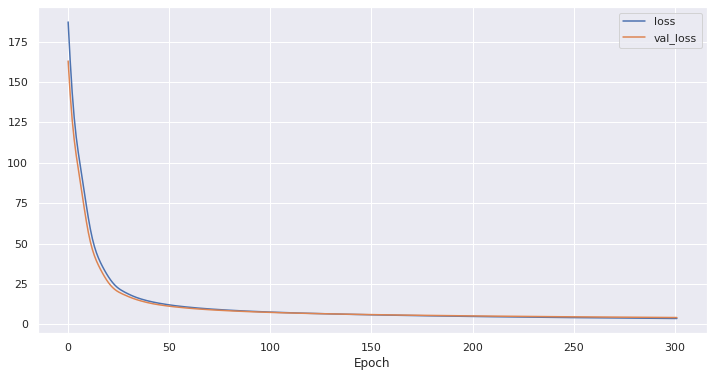

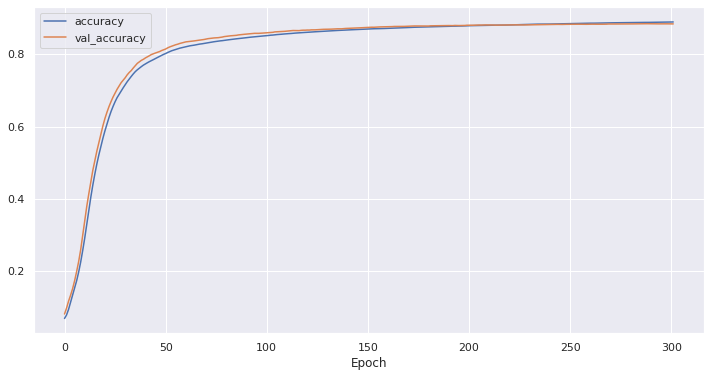

In [ ]:
# Plots
y_pred_A = fit_A.model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(fit_A.history['loss'], '-', label='loss')
plt.plot(fit_A.history['val_loss'], '-', label='val_loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(fit_A.history['accuracy'], '-', label='accuracy')
plt.plot(fit_A.history['val_accuracy'], '-', label='val_accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

array([[ 933,    0,    5,    6,    1,   16,   14,    2,    2,    1],
       [   0, 1088,   10,    4,    0,    6,    4,    3,   19,    1],
       [   9,    9,  876,   41,   13,    5,   19,   18,   38,    4],
       [   6,    0,   29,  878,    3,   35,    3,   12,   36,    8],
       [   3,    0,    2,    4,  876,    1,   21,    8,   12,   55],
       [  10,    3,    6,   39,    8,  726,   14,    7,   67,   12],
       [  13,    4,   10,    2,   10,   21,  889,    5,    4,    0],
       [   3,    7,   21,   12,   12,    2,    1,  914,    4,   52],
       [   9,    5,   16,   35,   12,   48,   21,    9,  802,   17],
       [   9,    8,    1,   10,   52,   11,    0,   34,   25,  859]])

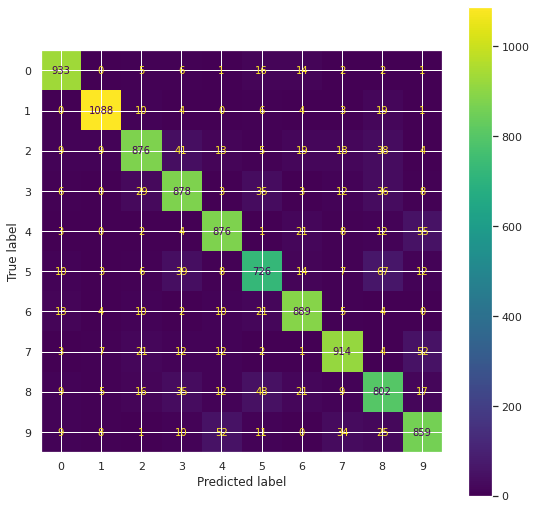

In [ ]:
# ConfusionMatrixDisplay
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_A, axis=1))
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(9,9))
cmp.plot(ax=ax)
cm

## Prosty Perceptron - stochastic mode
Zasadniczo identyczny z poprzednim modelem, jednak wykorzystujący inny sposób uczenia. Tutaj *batch size* jest równy 1, co oznacza że wagi sieci są aktualizowane po każdej próbce (pojedyńczym przykładzie).

In [ ]:
# Initialize model
model_A_2 = models.Sequential()
model_A_2.add(layers.InputLayer(input_shape=(n_pixels,)))
model_A_2.add(layers.Dense(10, activation='softmax', name='out'))
model_A_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_A_2.summary()

# Fit model
fit_A_2 = model_A_2.fit(X_train, y_train,
                    epochs=5,
                    batch_size=1,
                    shuffle=True,
                    use_multiprocessing=True,
                    validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
out (Dense)                  (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 91s 2ms/step - loss: 28.3397 - accuracy: 0.8502 - val_loss: 29.0560 - val_accuracy: 0.8664
Epoch 2/5
60000/60000 [==============================] - 106s 2ms/step - loss: 28.6497 - accuracy: 0.8762 - val_loss: 32.6592 - val_accuracy: 0.8765
Epoch 3/5
60000/60000 [==============================] - 95s 2ms/step - loss: 28.8031 - accuracy: 0.8786 - val_loss: 24.9244 - val_accuracy: 0.9017
Epoch 4/5
60000/60000 [==============================] - 93s 2ms/step - loss: 28.7698 - accuracy: 0.8822 - val_loss: 29.4616 - val_accuracy: 0.8810
Epoch 5/5
60000/60000 [==============================

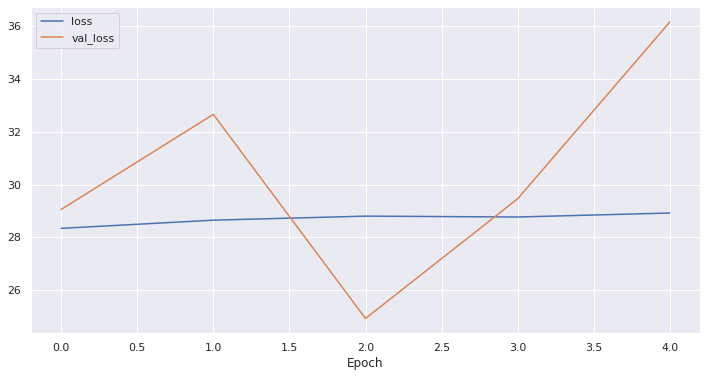

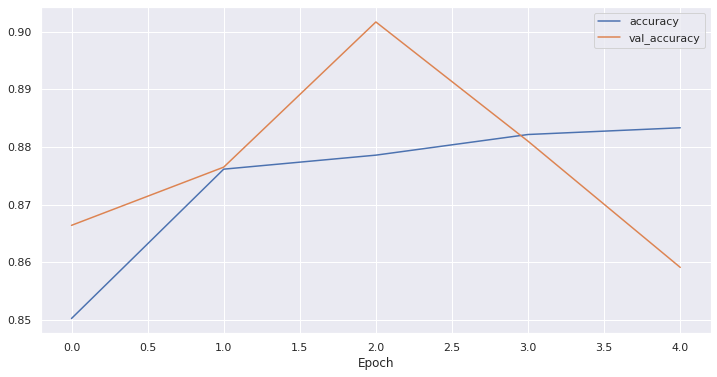

In [ ]:
# Plots for A_2
y_pred_A_2 = fit_A.model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(fit_A_2.history['loss'], '-', label='loss')
plt.plot(fit_A_2.history['val_loss'], '-', label='val_loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(fit_A_2.history['accuracy'], '-', label='accuracy')
plt.plot(fit_A_2.history['val_accuracy'], '-', label='val_accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

Po wykresach widać, że model był najlepiej dopasowany po 3 epoce. Należało by skorzystać z odpowiedniej opcji przy trenowaniu modelu, aby zapisywał tę najlepszą epokę jako wynik końcowy. 
Potem model został przetrenowany, ale zostawiam w ten sposób, bo uważam to za ciekawy przykład.

array([[ 933,    0,    5,    6,    1,   16,   14,    2,    2,    1],
       [   0, 1088,   10,    4,    0,    6,    4,    3,   19,    1],
       [   9,    9,  876,   41,   13,    5,   19,   18,   38,    4],
       [   6,    0,   29,  878,    3,   35,    3,   12,   36,    8],
       [   3,    0,    2,    4,  876,    1,   21,    8,   12,   55],
       [  10,    3,    6,   39,    8,  726,   14,    7,   67,   12],
       [  13,    4,   10,    2,   10,   21,  889,    5,    4,    0],
       [   3,    7,   21,   12,   12,    2,    1,  914,    4,   52],
       [   9,    5,   16,   35,   12,   48,   21,    9,  802,   17],
       [   9,    8,    1,   10,   52,   11,    0,   34,   25,  859]])

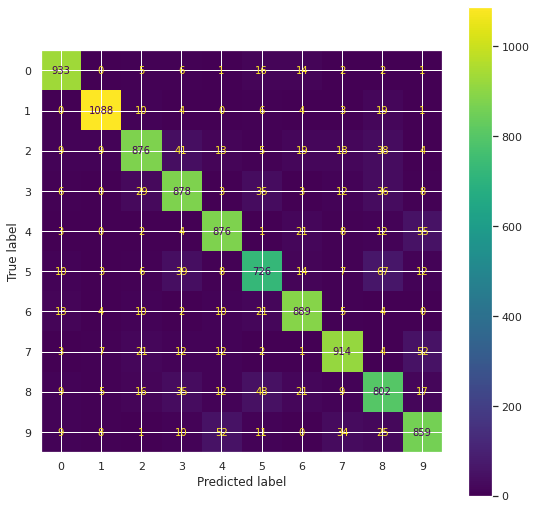

In [ ]:
# Confusion Matrix

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_A, axis=1))
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(9,9))
cmp.plot(ax=ax)
cm

## Sieć z ukrytą warstwą
Model z jedną warstwą ukrytą.  
Jeśli problem karegoryzacji cyfr nie jest liniowo separowalny, to dołożenie ukrytej warstwy (i zwiększenie liczby parametrów) powinno poprawić skuteczność modelu i poprawić wartość *accuracy*.

Do kolejnego modelu użyję znormalizowanych danych.

In [ ]:
# Normalize the data (0-255 -> 0-1)
print(f'Data normalization example:\n{X_train[0][404:408]}')
X_train = MinMaxScaler(copy=False).fit_transform(X_train).astype('float32')
X_test = MinMaxScaler(copy=False).fit_transform(X_test).astype('float32')
print(f'{X_train[0][404:408]}')

Data normalization example:
[  0  81 240 253]
[0.         0.31764707 0.9411765  0.99215686]


In [ ]:
# Initialize model
model_B = models.Sequential()
model_B.add(layers.InputLayer(input_shape=(n_pixels,)))
model_B.add(layers.Dense(n_pixels//6, activation='swish', name='hidden')) # activation='swish' or 'relu'
model_B.add(layers.Dense(10, activation='softmax', name='out'))
model_B.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_B.summary()
# plot_model(model, show_shapes=True, show_layer_activations=True)

# Train model
val_stop = EarlyStopping(monitor='val_loss', patience=4)
fit_B = model_B.fit(X_train, y_train,
                  epochs=100,
                  batch_size=32, # domyślna wartość
                  callbacks=[val_stop],
                  validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 130)               102050    
_________________________________________________________________
out (Dense)                  (None, 10)                1310      
Total params: 103,360
Trainable params: 103,360
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2787 - accuracy: 0.9201 - val_loss: 0.1547 - val_accuracy: 0.9517
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1278 - accuracy: 0.9622 - val_loss: 0.1035 - val_accuracy: 0.9691
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0908 - accuracy: 0.9733 - val_loss: 0.0898 - val_accuracy: 0.9725
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss

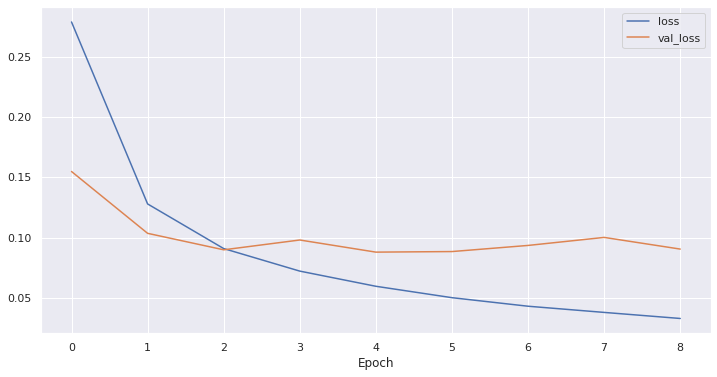

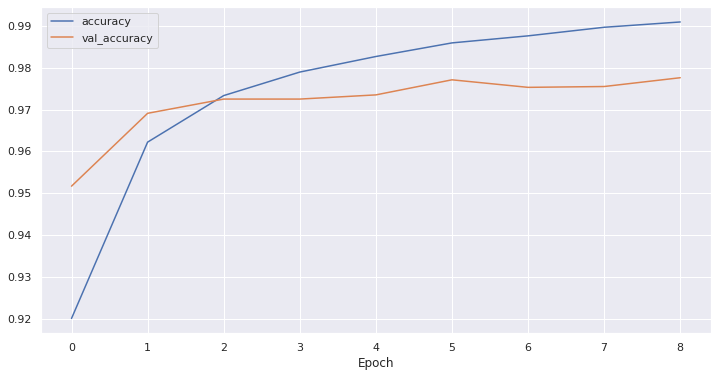

In [ ]:
# Plots for B
y_pred_B = fit_B.model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(fit_B.history['loss'], '-', label='loss')
plt.plot(fit_B.history['val_loss'], '-', label='val_loss')
plt.xlabel("Epoch")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(fit_B.history['accuracy'], '-', label='accuracy')
plt.plot(fit_B.history['val_accuracy'], '-', label='val_accuracy')
plt.xlabel("Epoch")
plt.legend()
plt.show()

array([[ 970,    0,    1,    0,    1,    1,    4,    1,    2,    0],
       [   0, 1122,    3,    0,    0,    0,    2,    2,    6,    0],
       [   3,    1, 1012,    1,    1,    0,    5,    2,    7,    0],
       [   0,    0,    6,  987,    0,    4,    0,    5,    4,    4],
       [   1,    0,    1,    1,  958,    0,    5,    1,    0,   15],
       [   2,    0,    0,    8,    1,  865,    4,    1,    9,    2],
       [   5,    3,    1,    1,    4,    4,  938,    0,    2,    0],
       [   2,    2,   14,    4,    3,    0,    0,  986,    4,   13],
       [   2,    0,    3,    4,    3,    0,    2,    2,  952,    6],
       [   1,    2,    0,    4,    7,    4,    0,    0,    5,  986]])

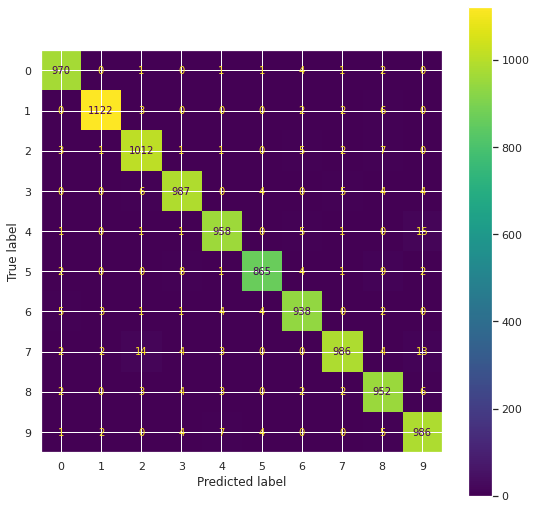

In [ ]:
# Confusion Matrix

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred_B, axis=1))
cmp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(9,9))
cmp.plot(ax=ax)
cm

### Przewidywia modelu B
Poniżej przedstawiam kilka pierwszych próbek ze zbioru testowego wraz z odpowiedzią, do jakiej kategorii zostały zaklasyfikowane.

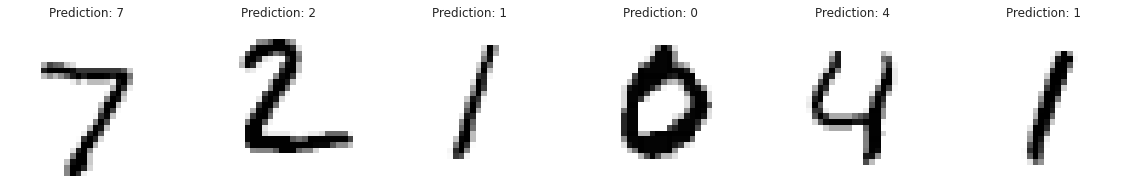

In [ ]:
# Show predictions

y_pred = np.argmax(y_pred_B, axis=1)
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 4))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

### Pomyłki modelu B
Poniżej przedstawiam kilka pierwszych próbek ze zbioru testowego, które zostały zaklasyfikowane **błędnie**. Pierwsza cyfra oznacza prawidłową odpowiedź, a za nią znajduje się odpowiedź modelu.

Misclassified on indexes:  [217 247 259 321 381 445 447 448 582 613]  (first 10)


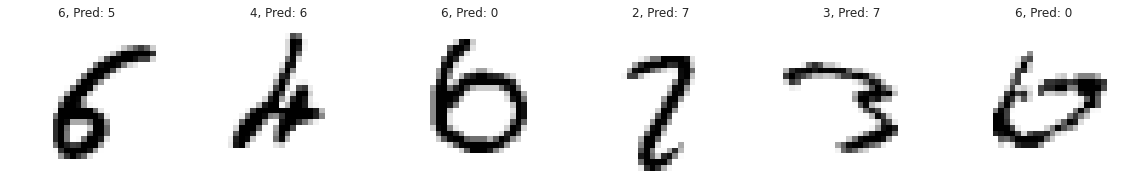

In [ ]:
# Get indexes of misclassifications
y_test_arg = np.argmax(y_test, axis=1)
mscl = y_test_arg != y_pred
mscl = mscl.nonzero()[0]
X_test_mscl = X_test[mscl]
y_pred_mscl = y_pred[mscl]
y_correct_mscl = y_test_arg[mscl]
print("Misclassified on indexes: ", mscl[:10], " (first 10)")

# Show misclassifications
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 4))
for ax, image, prediction, correct in zip(axes, X_test_mscl, y_pred_mscl, y_correct_mscl):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"{correct}, Pred: {prediction}")

## Podsumowanie
Model pierwszy był w stanie osiągnąć skuteczność na poziomie ok. 90%.
Uczenie modelu każdorazowo całym zbiorem danych cechowało się minimalnie mniejszą skutecznością, w porównaniu do najlepszej epoki z uczenia przykład po przykładzie.  
Model wielowarstwowy okazał się o wiele skuteczniejszy, bo jego skuteczność zbliżała się do 98%, a więc nieporównywalnie lepiej od prostszych sieci bez ukrytej warstwy.  Zapewne wynika to z tego, że problem klasyfikacji cyfr z tego zbioru nie jest liniowo separowalny.